In [16]:
# Show plots inline, and load main getdist plot module and samples class
from __future__ import print_function
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples, loadMCSamples
import getdist
# use this *after* importing getdist if you want to use interactive plots
# %matplotlib notebook
import matplotlib.pyplot as plt
import IPython
import numpy as np
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))
# matplotlib 2 may not work very well without usetex on, can uncomment
# plt.rcParams['text.usetex']=True

import math as m
import statistics as s
from scipy import stats
%pylab inline


import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from scipy.integrate import quad

GetDist Version: 1.1.0, Matplotlib version: 3.1.3
Populating the interactive namespace from numpy and matplotlib


/home/kylar/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['ylim', 'xlim', 'roots']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [17]:
def cl_reader(file, delim):
    
    #base_dir = '../class_default/output/'
    
    #stable method to read in tabular data
    file = open(file)
    table = file.readlines()
    file.close()
    
    header_length = 11
    #defining the length of the actual data of the table
    i = len(table)-header_length
    
    #preallocating the arrays for memory
    ell = np.zeros(i)
    TT = np.zeros(i)
    EE = np.zeros(i)
    TE = np.zeros(i)
    BB = np.zeros(i)
    phiphi = np.zeros(i)
    Tphi = np.zeros(i)
    Ephi = np.zeros(i)

    lc = 0
    
    for line in table:
        lc += 1
        i = lc - header_length - 1
        data = line.strip('\n').strip().split(delim)
        if lc>header_length:
            ell[i] = float(data[0])
            TT[i] = float(data[1])
            EE[i] = float(data[2])
            TE[i] = float(data[3])
            BB[i] = float(data[4])
            phiphi[i] = float(data[5])
            Tphi[i] = float(data[6])
            Ephi[i] = float(data[7])

    name = []
    for a in range(len(ell)):
        name.append([ell[a],TT[a],EE[a],TE[a],BB[a],phiphi[a],Tphi[a],Ephi[a]])        
    
    i = len(name)
    ell = np.zeros(i)
    TT = np.zeros(i)
    EE = np.zeros(i)
    TE = np.zeros(i)
    BB = np.zeros(i)
    phiphi = np.zeros(i)
    Tphi = np.zeros(i)
    Ephi = np.zeros(i)
    
    for i in range(len(name)):
        temp = name[i]
        ell[i] = temp[0]
        TT[i] = temp[1]
        EE[i] = temp[2]
        TE[i] = temp[3]
        BB[i] = temp[4]
        phiphi[i] = temp[5]
        Tphi[i] = temp[6]
        Ephi[i] = temp[7]

    output = np.array(7)
    output = np.array([ell,TT,EE,TE,BB,phiphi,Tphi,Ephi])
    
    return output

LCDM_cls = cl_reader('../class_mirror3.1.3/output/bestfit_plc2018_cl.dat','      ')
LCDM_lensed_cls = cl_reader('../class_mirror3.1.3/output/bestfit_plc2018_cl_lensed.dat','      ')

    
tFFAT_cls = cl_reader('../class_mirror3.1.3/output/mirror_cl.dat','      ')
tFFAT_lensed_cls = cl_reader('../class_mirror3.1.3/output/mirror_cl_lensed.dat','      ')

ell_point = [47 ,76 ,105 ,135 ,165 ,195 ,225 ,255 ,285 ,314 ,344 ,374 ,404 ,434
 ,464 ,494 ,524 ,554 ,584 ,614 ,644 ,674 ,704 ,734 ,764 ,794 ,824 ,854
 ,884 ,914 ,944 ,974 ,1004 ,1034 ,1064 ,1094 ,1124 ,1154 ,1184 ,1214 ,1244 ,1274
 ,1304 ,1334 ,1364 ,1394 ,1424 ,1454 ,1484 ,1514 ,1544 ,1574 ,1604 ,1634 ,1664 ,1694
 ,1724 ,1754 ,1784 ,1814 ,1844 ,1874 ,1904 ,1934 ,1964 ,1994 ,2024 ,2054 ,2084 ,2114
 ,2144 ,2174 ,2204 ,2234 ,2264 ,2294 ,2324 ,2354 ,2384 ,2414 ,2444 ,2474 ,2499]

tt_point = [1487.252 ,2042.918 ,2960.235 ,3868.376 ,4886.579 ,5464.151 ,5786.167 ,5366.121
 ,4627.076 ,3600.453 ,2630.058 ,2030.65 ,1750.862 ,1784.114 ,2159.716 ,2419.46
 ,2571.106 ,2542.553 ,2358.374 ,2092.941 ,1882.165 ,1811.399 ,1881.812 ,2094.279
 ,2315.466 ,2463.087 ,2518.245 ,2390.562 ,2081.48 ,1738.794 ,1415.486 ,1171.528
 ,1060.363 ,1046.307 ,1130.338 ,1208.609 ,1229.252 ,1203.915 ,1114.669 ,966.075
 ,863.127 ,760.694 ,730.221 ,735.755 ,772.715 ,804.727 ,806.433 ,775.971
 ,727.218 ,646.819 ,550.257 ,475.133 ,417.922 ,393.728 ,389.662 ,391.119
 ,397.727 ,382.534 ,372.509 ,340.483 ,307.219 ,272.646 ,247.589 ,242.002
 ,232.959 ,234.213 ,229.454 ,220.446 ,215.982 ,196.938 ,176.426 ,152.445
 ,139.872 ,123.667 ,117.255 ,116.533 ,109.389 ,112.822 ,114.131 ,87.931
 ,97.586 ,73.113 ,64.027]

tt_err_point = [51.307 ,55.064 ,65.335 ,77.296 ,86.968 ,90.9 ,87.431 ,77.18 ,62.704 ,47.287
 ,33.959 ,24.871 ,20.747 ,20.699 ,22.778 ,24.999 ,25.945 ,25.069 ,22.741 ,19.864
 ,17.506 ,16.425 ,16.786 ,18.145 ,19.71 ,20.673 ,20.485 ,19.01 ,16.56 ,13.729
 ,11.14 ,9.285 ,8.372 ,8.284 ,8.658 ,9.074 ,9.213 ,8.933 ,8.273 ,7.458
 ,6.558 ,5.9 ,5.596 ,5.619 ,5.832 ,6.054 ,6.131 ,5.983 ,5.617 ,5.116
 ,4.598 ,4.174 ,3.914 ,3.832 ,3.889 ,4.019 ,4.154 ,4.246 ,4.281 ,4.279
 ,4.273 ,4.305 ,4.403 ,4.578 ,4.822 ,5.231 ,5.685 ,6.012 ,6.342 ,6.681
 ,7.044 ,7.45 ,7.915 ,8.451 ,9.062 ,9.746 ,10.499 ,11.321 ,12.209 ,13.168
 ,14.212 ,15.344 ,20.736]

ell_point_ee = [47, 76, 105, 135, 165, 195, 225, 255, 285, 314, 344, 374, 404, 434
, 464, 494, 524, 554, 584, 614, 644, 674, 704, 734, 764, 794, 824, 854
, 884, 914, 944, 974, 1004, 1034, 1064, 1094, 1124, 1154, 1184, 1214, 1244, 1274
, 1304, 1334, 1364, 1394, 1424, 1454, 1484, 1514, 1544, 1574, 1604, 1634, 1664, 1694
, 1724, 1754, 1784, 1814, 1844, 1874, 1904, 1934, 1964, 1988]
ee_point = [0.104, 0.431, 0.868, 1.094, 1.007, 0.809, 1.179, 2.942, 6.653, 11.942
, 17.073, 20.379, 21.176, 18.977, 14.21, 9.897, 6.821, 9.167, 15.104, 24.174
, 31.663, 36.59, 37.665, 30.901, 24.498, 17.594, 12.933, 14.013, 21.276, 27.445
, 37.797, 40.162, 40.997, 37.792, 31.139, 20.772, 15.55, 13.581, 14.913, 21.509
, 27.729, 30.977, 31.139, 29.193, 21.715, 19.015, 14.194, 10.987, 13.084, 14.768
, 22.205, 9.44, 27.029, 21.388, 23.952, 12.803, 14.488, 28.433, -1.795, 21.576
, 0.342, 19.183, 9.607, 14.983, 4.392, 13.506]
ee_err_point = [1.7000e-02, 2.7000e-02, 4.0000e-02, 4.9000e-02, 5.3000e-02, 5.8000e-02
, 7.3000e-02, 1.0700e-01, 1.6400e-01, 2.3700e-01, 3.0900e-01, 3.5900e-01
, 3.7500e-01, 3.5800e-01, 3.2600e-01, 2.9700e-01, 2.5400e-01, 2.9400e-01
, 3.7300e-01, 4.7300e-01, 5.6900e-01, 6.3500e-01, 6.5800e-01, 6.4700e-01
, 6.2300e-01, 6.1300e-01, 6.3600e-01, 6.9800e-01, 7.9500e-01, 9.1600e-01
, 1.0410e+00, 1.1490e+00, 1.3850e+00, 1.5210e+00, 1.5790e+00, 1.6470e+00
, 1.7400e+00, 1.8680e+00, 2.0290e+00, 2.2170e+00, 2.4230e+00, 2.6350e+00
, 2.8470e+00, 3.0610e+00, 3.2820e+00, 3.5200e+00, 3.7880e+00, 4.0920e+00
, 4.4350e+00, 4.8190e+00, 5.2390e+00, 5.6930e+00, 6.1800e+00, 6.7000e+00
, 7.2600e+00, 7.8670e+00, 8.5310e+00, 9.2610e+00, 1.0064e+01, 1.0946e+01
, 1.1912e+01, 1.2967e+01, 1.4117e+01, 1.5368e+01, 1.6730e+01, 2.4141e+01]

import matplotlib.pyplot as plt
import numpy as np
import itertools

files = ['/home/kylar/class_base/output/explanatory02_cl_lensed.dat', '../backup_class_fcv/carc_output/fcv_cl_lensed.dat']
data = []
for data_file in files:
    data.append(np.loadtxt(data_file))
roots = ['Baseline', 'Baseline+Scaling of 1.1']

#fig, ax = plt.subplots()

index, curve = 0, data[0]
y_axis = ['EE']
tex_names = ['EE']
x_axis = 'l'
ylim = []
xlim = []
#ax.plot(curve[:, 0], curve[:, 2])
baseline = curve[:,2]
ee_baseline = baseline*2.726**2

index, curve = 1, data[1]
y_axis = ['EE']
tex_names = ['EE']
x_axis = 'l'
ylim = []
xlim = []
#ax.plot(curve[:, 0], curve[:, 2])
scaling = curve[:, 2]

#files = ['carc_output/fcv00_cl_lensed.dat', 'carc_output/fcv_cl_lensed.dat']
data = []
for data_file in files:
    data.append(np.loadtxt(data_file))
roots = ['Baseline', 'Baseline+Scaling of 1.1']

#fig, ax = plt.subplots()

index, curve = 0, data[0]
y_axis = ['TT']
tex_names = ['TT']
x_axis = 'l'
ylim = []
xlim = []
#ax.plot(curve[:, 0], curve[:, 1])
baseline2 = curve[:,1]
tt_baseline = baseline2*(10**12)*2.726**2
index, curve = 1, data[1]
y_axis = ['TT']
tex_names = ['TT']
x_axis = 'l'
ylim = []
xlim = []
#ax.plot(curve[:, 0], curve[:, 1])
scaling2 = curve[:,1]

In [18]:
def pk_reader(file, delim):
    
    #base_dir = '../class_default/output/'
    
    #stable method to read in tabular data
    file = open(file)
    table = file.readlines()
    file.close()
    
    header_length = 4
    #defining the length of the actual data of the table
    i = len(table)-header_length
    
    #preallocating the arrays for memory
    k = np.zeros(i)
    P = np.zeros(i)

    lc = 0
    
    for line in table:
        lc += 1
        i = lc - header_length - 1
        data = line.strip('\n').strip().split(delim)
        if lc>header_length:
            k[i] = float(data[0])
            P[i] = float(data[1])

    name = []
    for a in range(len(k)):
        name.append([k[a],P[a]])        
    
    i = len(name)
    k = np.zeros(i)
    P = np.zeros(i)

    
    for i in range(len(name)):
        temp = name[i]
        k[i] = temp[0]
        P[i] = temp[1]

    output = np.array([k,P])
    
    return output

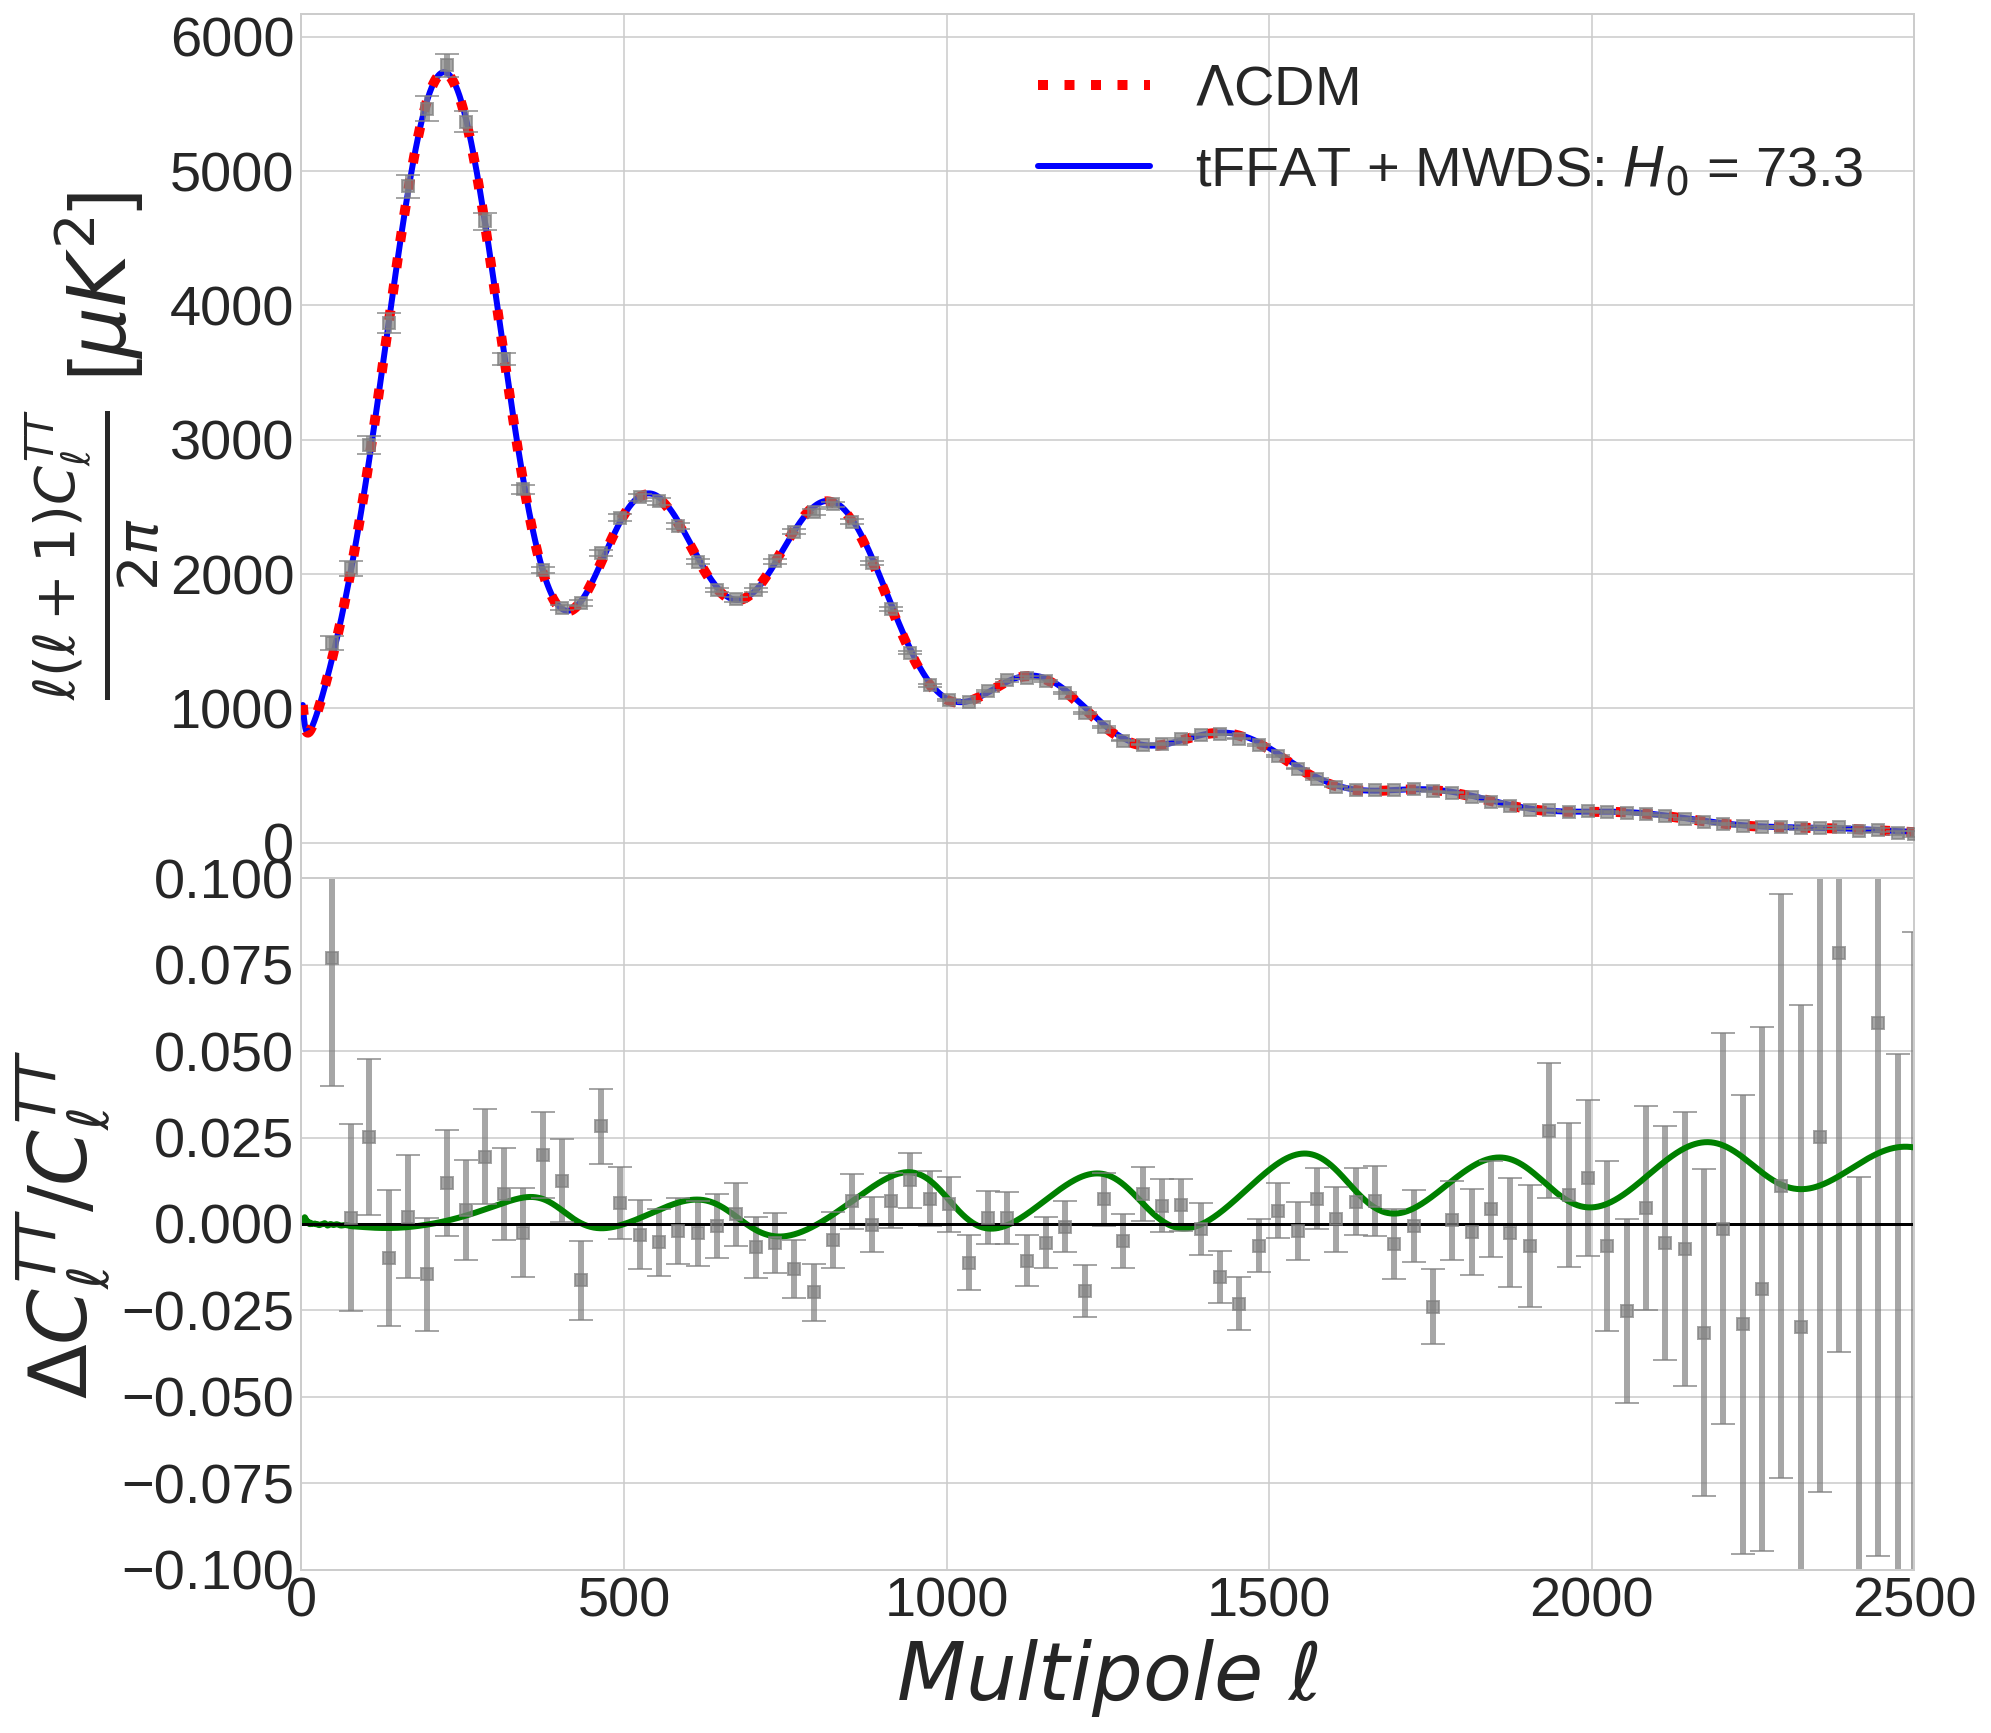

In [19]:
tt_open = np.loadtxt("../class_fcv/tt_ds.txt")
ee_open = np.loadtxt("../class_fcv/ee_ds.txt")
ell = np.loadtxt("../class_fcv/ell_ds.txt")


tt_cal_open = (tt_open*ell*(ell+1)/(2*np.pi))*(10**12)*(2.726**2)
ee_cal_open = (ee_open*ell*(ell+1)/(2*np.pi))*(2.726**2)

x1 = LCDM_lensed_cls[0]
y1 = LCDM_lensed_cls[1]*(10**12)*(2.726**2)
#x2 = mFFAT_lensed_cls[0]
#y2 = mFFAT_lensed_cls[1]*(10**12)*(2.726**2)
#y2 = tt_cal_open

x2 = tFFAT_lensed_cls[0]
y2 = tFFAT_lensed_cls[1]*(10**12)*(2.726**2)

#x2 = test[0]
#y2 = test[1]*(10**12)*(2.726**2)

y_res = (y2-y1)/y1
fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.errorbar(ell_point,tt_point,tt_err_point,fmt='s',color='gray',ms=6,label=r'$\rm Planck$ 2015',capsize = 6,elinewidth =3,alpha=0.7,zorder=11)
plt.xlim(0,2500)


plt.plot(x1,y1,color = 'red',linestyle='dotted',linewidth=5,zorder=10)
plt.plot(x2,y2,color = 'blue',linewidth=3,zorder=9)

#plt.xlim(7500,10)
#plt.xscale("log")


plt.grid(True)
frame1.set_xticklabels([]) 
#grid()

plt.yticks(fontsize= 28)
plt.ylabel(r'$\frac{\ell (\ell+1)C_{\ell}^{TT}}{2\pi}$ [$\mu K^2$]',fontsize=40)

plt.legend([r'$\Lambda$CDM','tFFAT + MWDS: $H_0$ = 73.3'],loc = 1, fontsize=28)


#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.4))        
plt.plot(x1, y_res,color='green',linewidth=3)
#plt.xlim(7500,10)
plt.ylim(-.1,.1)
#plt.xscale("log")
ell_point = np.array(ell_point)
plt.errorbar(ell_point,(tt_point-tt_baseline[(ell_point)-1])/tt_baseline[ell_point-1],tt_err_point/tt_baseline[ell_point-1],fmt='s',color='gray',ms=6,label=r'$\rm Planck$ 2015',capsize = 6,elinewidth =3,alpha=0.7)
plt.xlim(0,2500)


plt.axhline(0,color='black')
plt.grid(True)
#grid()
plt.xlabel(r"$\ell$",fontsize=38)
plt.yticks(fontsize= 28)
plt.ylabel(r'$\Delta C_{\ell}^{TT}/C_{\ell}^{TT}$',fontsize=40)
plt.xlabel('$Multipole~\ell$', fontsize=40)

plt.xticks(fontsize= 28)
#plt.axvline(x=FCV_z[item_index],color='blue')

fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('mirror_ttmodes.pdf', dpi=800,bbox_inches='tight')  


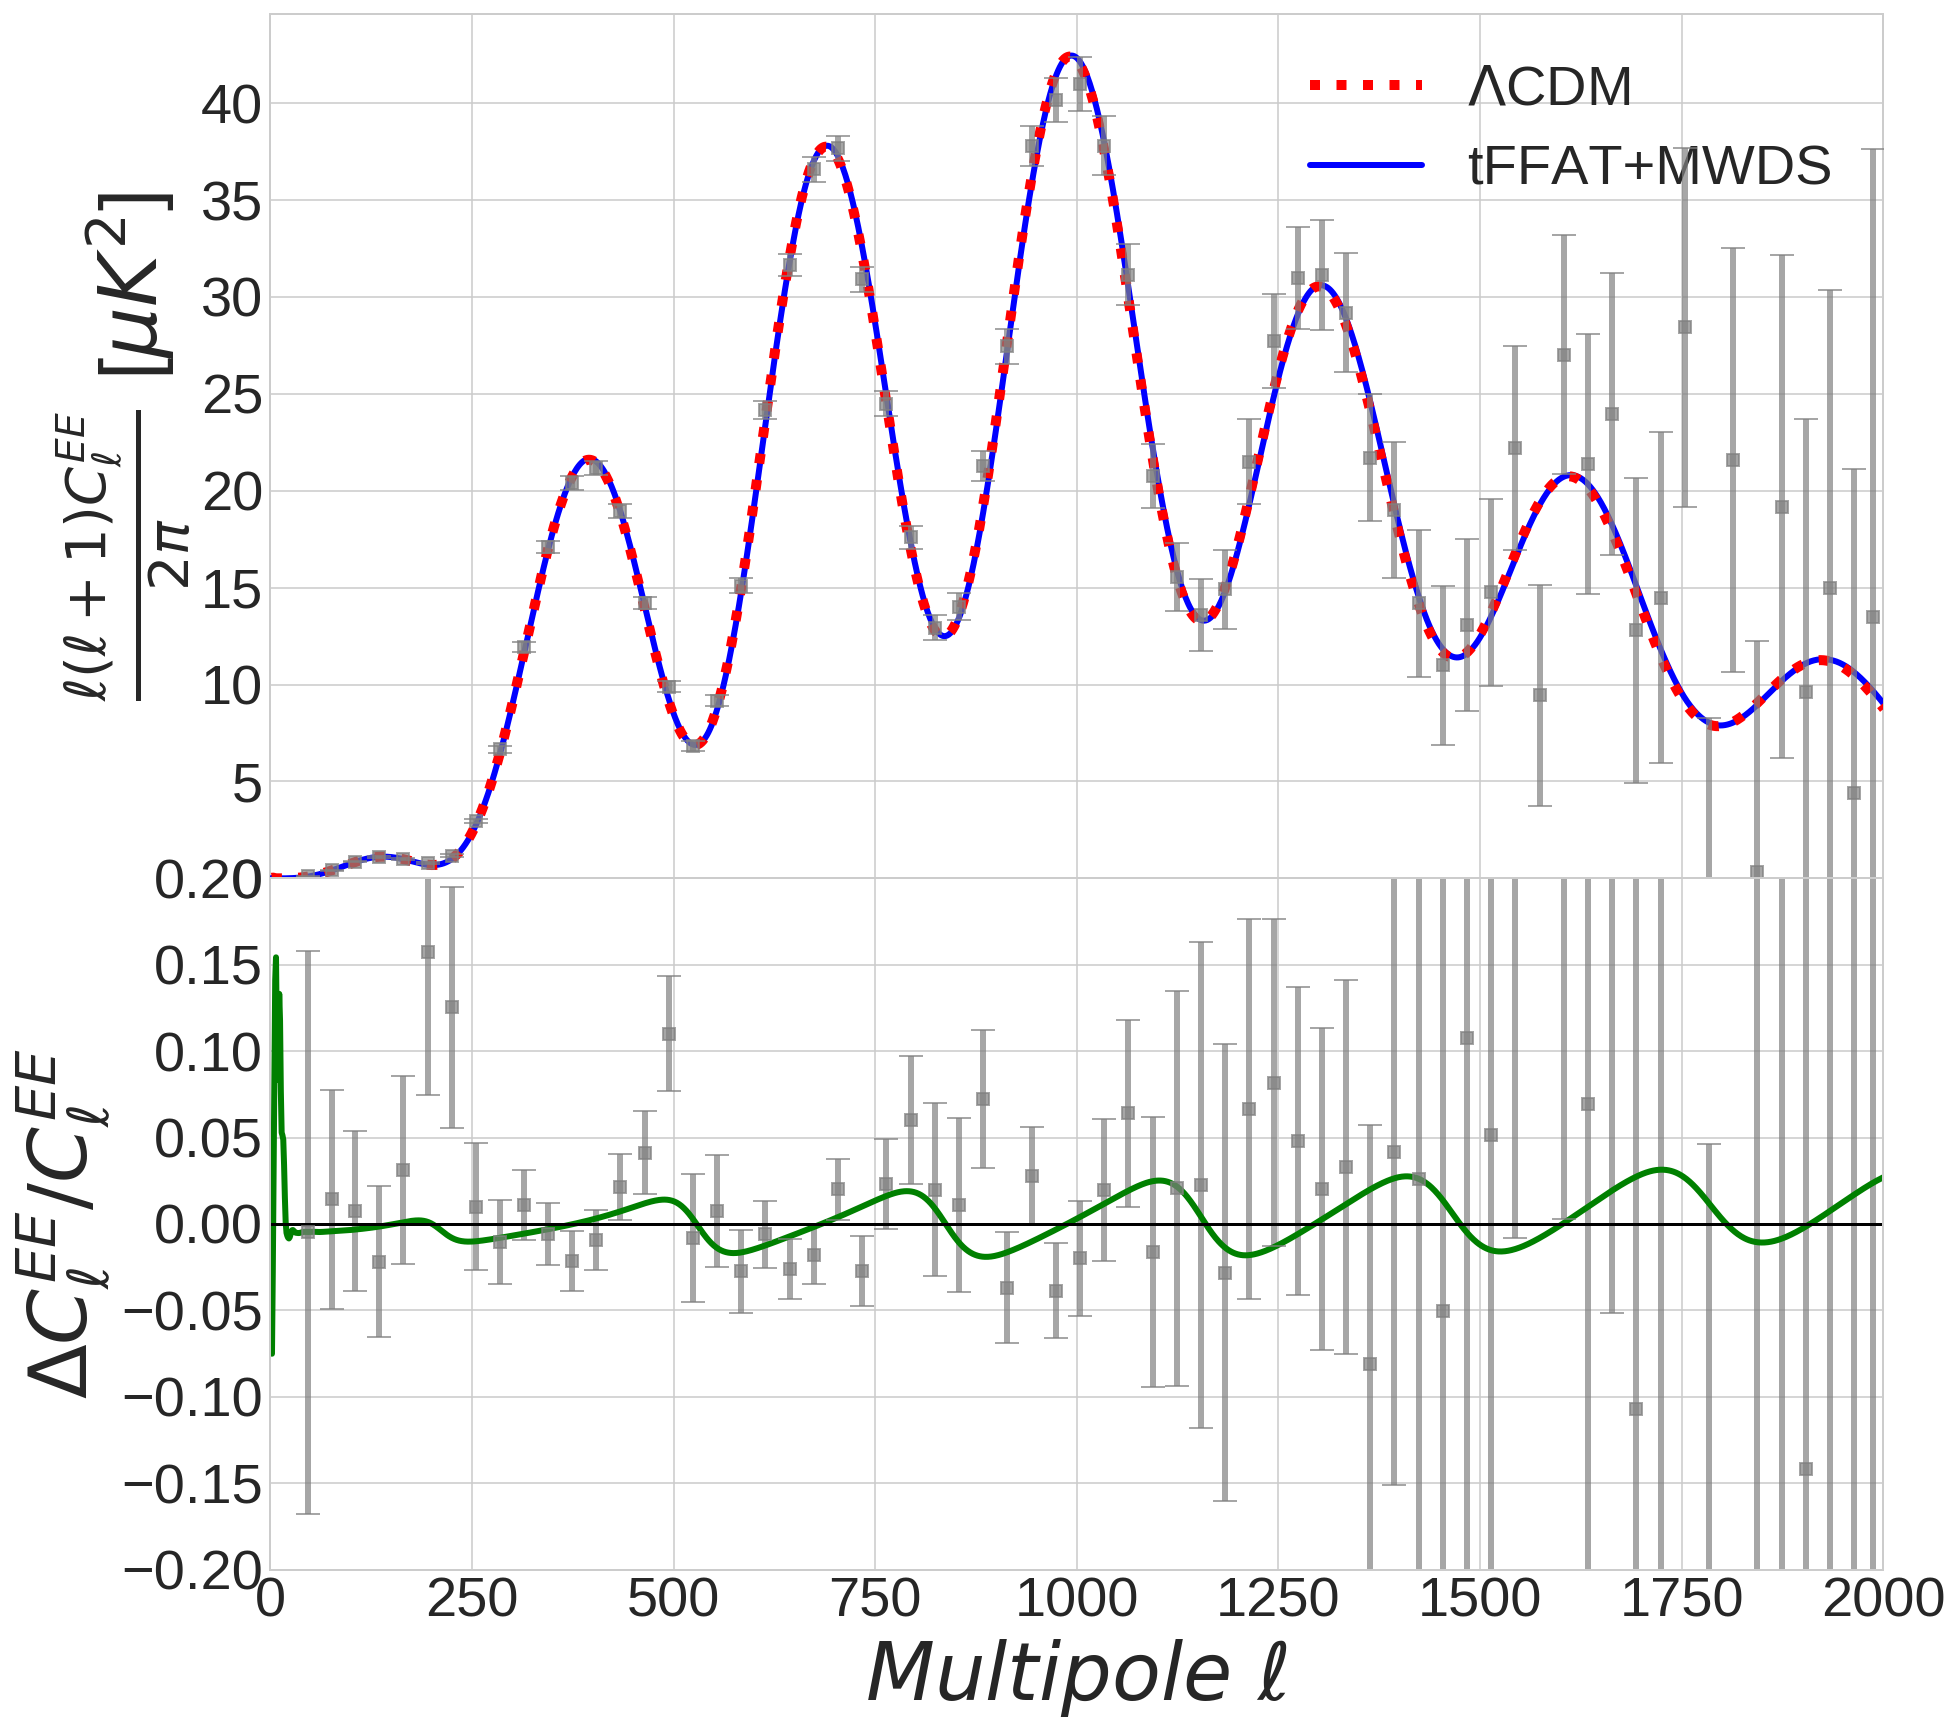

In [20]:
#plt.plot(LCDM_lensed_cls[0],LCDM_lensed_cls[2])
#plt.plot(mFFAT_lensed_cls[0],mFFAT_lensed_cls[2])
#plt.plot(tFFAT_lensed_cls[0],tFFAT_lensed_cls[2])

x1 = LCDM_lensed_cls[0]
y1 = LCDM_lensed_cls[2]*(10**12)*(2.726**2)
#x2 = mFFAT_lensed_cls[0]
#y2 = mFFAT_lensed_cls[2]*(10**12)*(2.726**2)
x2 = tFFAT_lensed_cls[0]
y2 = tFFAT_lensed_cls[2]*(10**12)*(2.726**2)

y_res = (y2-y1)/y1

fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))

plt.plot(x1,y1,color = 'red',linestyle='dotted',linewidth=5,zorder=10)
plt.plot(x2,y2,color = 'blue',linewidth=3,zorder=9)
plt.xlim(0,2000)
plt.ylim(0,)

plt.errorbar(ell_point_ee,ee_point,ee_err_point,fmt='s',color='gray',ms=6,label=r'$\rm Planck$ 2015',capsize = 6,elinewidth =3,alpha=0.7,zorder=11)



plt.grid(True)
frame1.set_xticklabels([]) 
#grid()

plt.yticks(fontsize= 28)
plt.ylabel(r'$\frac{\ell (\ell+1)C_{\ell}^{EE}}{2\pi}$ [$\mu K^2$]',fontsize=40)

plt.legend([r'$\Lambda$CDM','tFFAT+MWDS'],loc = 1, fontsize=28)


#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.4))        
plt.plot(x1, y_res,color='green',linewidth=3)
plt.xlim(0,2000)
plt.ylim(-.2,0.2)
#plt.ylim(-0.05,0.05)

ell_point_ee = np.array(ell_point_ee)
plt.errorbar(ell_point_ee,(ee_point-ee_baseline[ell_point_ee-1]*(10**12))/(ee_baseline[ell_point_ee-1]*(10**12)),ee_err_point/(ee_baseline[ell_point_ee-1]*(10**12)),fmt='s',color='gray',ms=6,label=r'$\rm Planck$ 2015',capsize = 6,elinewidth =3,alpha=0.7)


plt.axhline(0,color='black')
plt.grid(True)
#grid()
plt.xlabel('$Multipole~\ell$', fontsize=40)
plt.yticks(fontsize= 28)
plt.ylabel(r'$\Delta C_{\ell}^{EE}/C_{\ell}^{EE}$',fontsize=40)
plt.xticks(fontsize= 28)
#plt.axvline(x=FCV_z[item_index],color='blue')

fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('mirror_eemodes.pdf', dpi=800,bbox_inches='tight')  


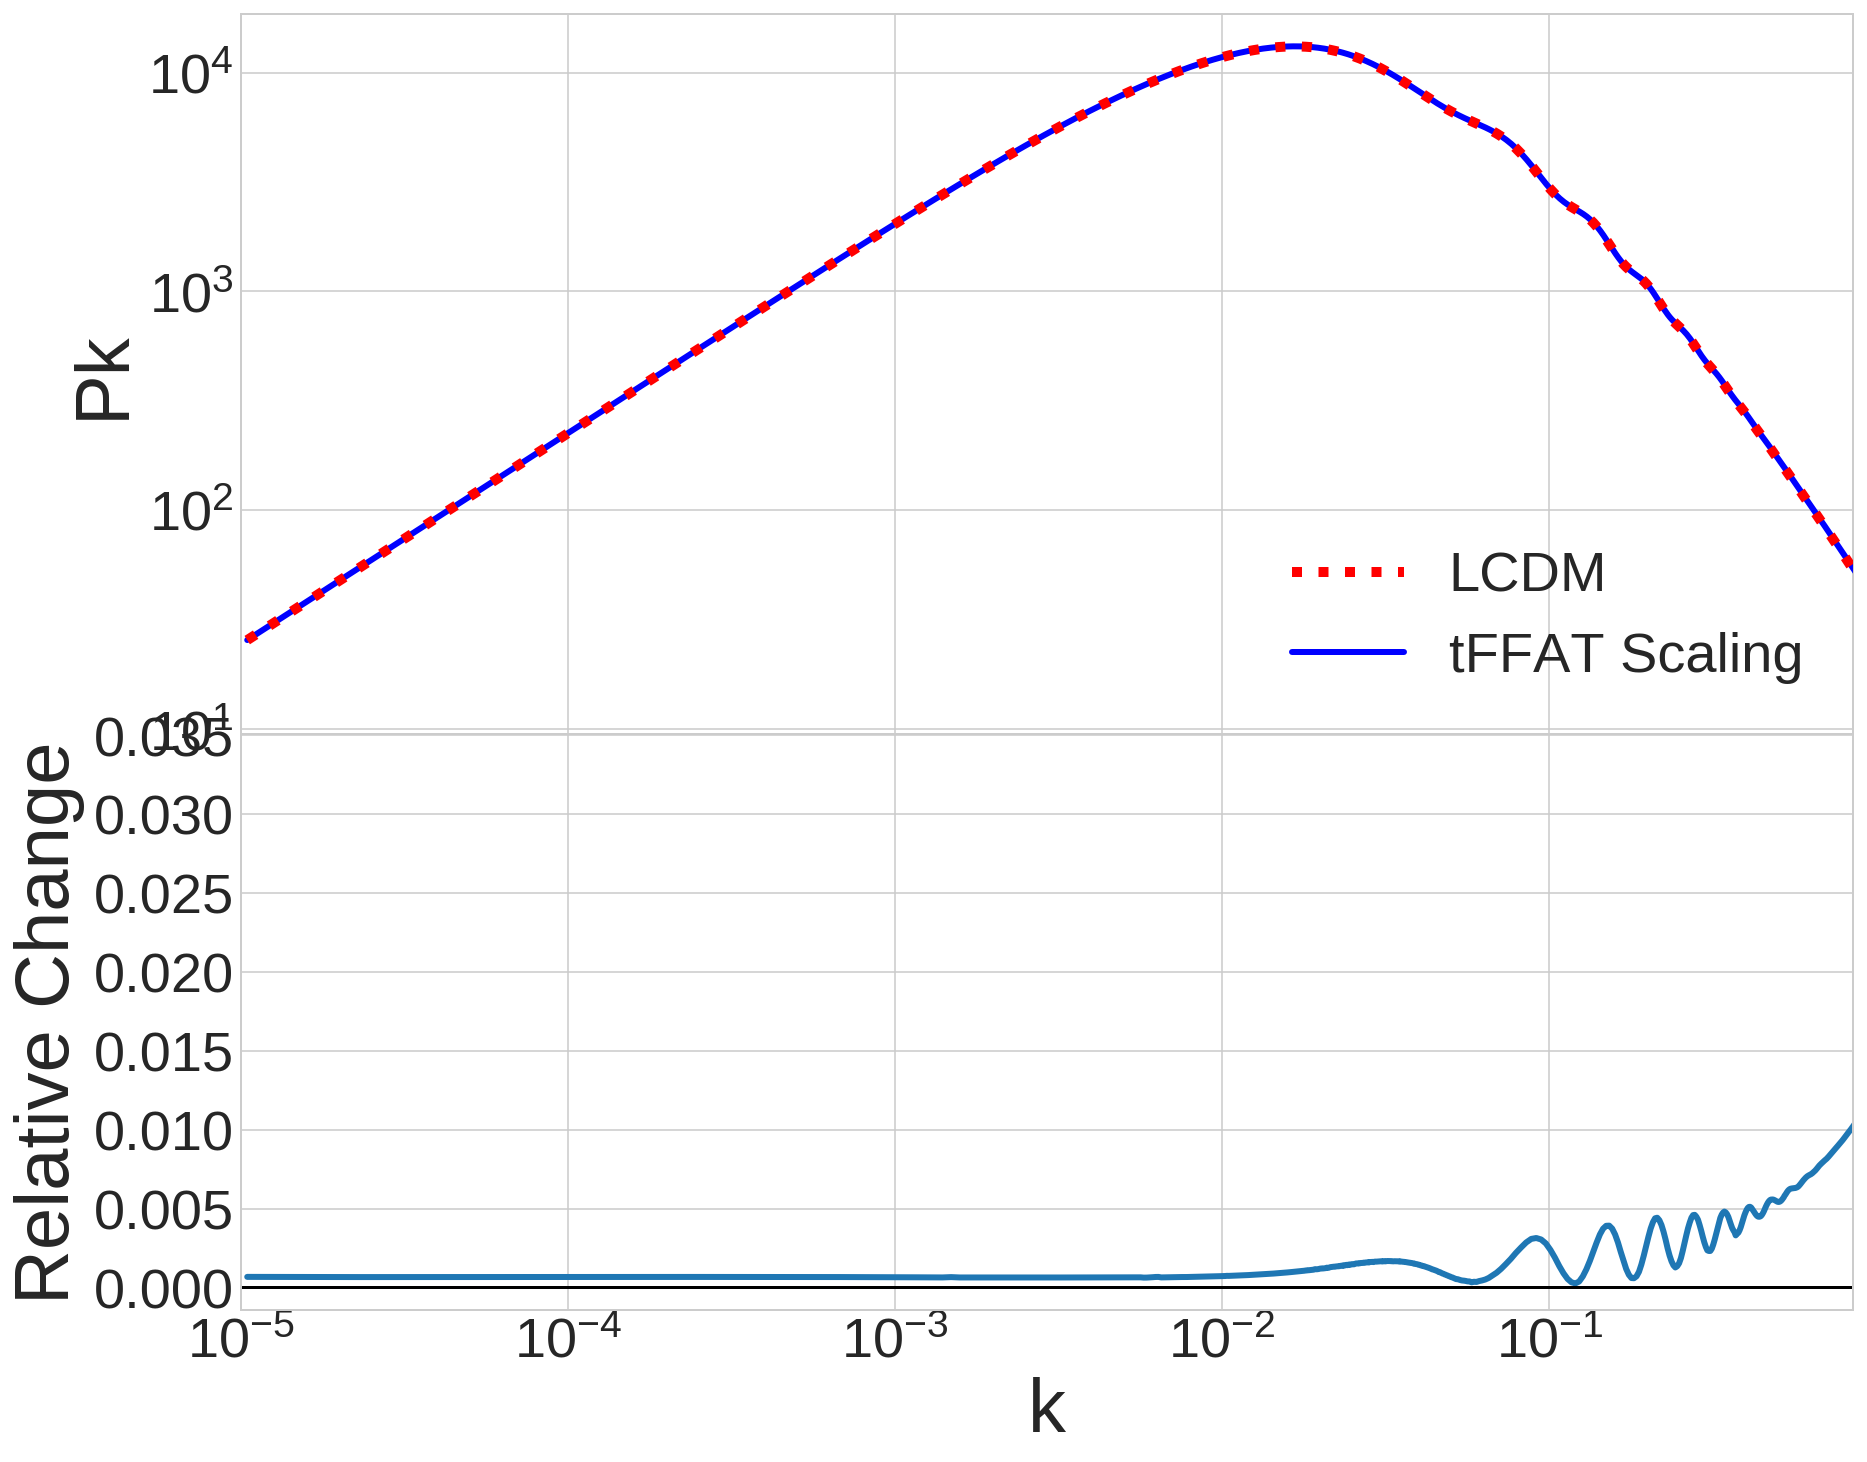

In [21]:
LCDM_pk = pk_reader('../class_mirror3.1.3/output/bestfit_plc2018_pk.dat','      ')
FFAT_pk = pk_reader('../class_mirror3.1.3/output/mirror_pk.dat','      ')
#FFAT_pk = pk_reader('../class_fcv/output/tFFAT_pk.dat','      ')

x1 = LCDM_pk[0]
y1 = LCDM_pk[1]
x2 = FFAT_pk[0]
y2 = FFAT_pk[1]

y2_interp = np.zeros(len(LCDM_pk[0]))
for i in range(len(LCDM_pk[0])):
    y2_interp[i] = np.interp(LCDM_pk[0][i],x2,y2)

y_res = (y2_interp-y1)/y1

fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))

plt.plot(x1,y1,color = 'red',linestyle='dotted',linewidth=5,zorder=10)
plt.plot(x2,y2,color = 'blue',linewidth=3,zorder=9)
plt.xlim(1e-5,0.85)

plt.xscale("log")
plt.yscale("log")
plt.grid(True)
frame1.set_xticklabels([]) 
#grid()

plt.yticks(fontsize= 28)
plt.ylabel(r"Pk",fontsize=38)

plt.legend(['LCDM','tFFAT Scaling'],loc = "lower right", fontsize=28)


#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.4))        
plt.plot(x1, y_res,linewidth=3)
plt.xlim(1e-5,0.85)
#plt.ylim(-0.025,0.025)
#plt.ylim(-0.01,0.01)
plt.xscale("log")
plt.axhline(0,color='black')
plt.grid(True)
#grid()

plt.xlabel(r"k",fontsize=38)
plt.yticks(fontsize= 28)
plt.ylabel("Relative Change",fontsize=38)
plt.xticks(fontsize= 28)
#plt.axvline(x=FCV_z[item_index],color='blue')

fig = plt.gcf()
fig.set_size_inches(14, 10)
fig.savefig('mirror_pk.pdf', dpi=800,bbox_inches='tight')  
